-04-Basics-of-image-processing  © by A.Richter
------------------------------------------

Intro to Image Analysis
--

In [1]:
import skimage
import skimage.io as skio
from skimage import exposure
from scipy.misc import bytescale

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

Import of Images with **Scikit-Image**
--

The following images are multi-channel IKONOS with a resolution of 4m multi and 1m pan

(1764, 1874) uint16 2047
[[526 559 546 504 488 492 488 488 490 490]
 [529 557 563 515 483 486 487 496 504 497]
 [530 556 569 526 470 457 467 483 490 482]
 [505 559 587 561 504 471 460 475 491 496]
 [455 538 586 572 517 477 482 490 502 509]
 [462 542 574 583 469 416 511 536 516 514]
 [468 521 545 572 517 406 450 509 498 497]
 [443 454 481 518 563 419 413 512 491 489]
 [354 423 398 379 531 522 467 490 486 489]
 [488 500 482 422 473 563 528 469 466 482]]


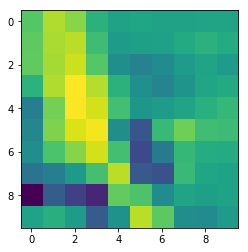

In [2]:
Folder='IKONOS2_dodola_MS_Kanaele/'
#IKOPan=skio.imread(Folder+'IKONOS2_dodola_Pan_Kanal/_Tif/po_221141_pan_sub.TIF')
IKORed=skio.imread(Folder+'po_221141_red_sub.TIF')
IKOGreen=skio.imread(Folder+'po_221141_green_sub.TIF')
IKOBlue=skio.imread(Folder+'po_221141_blue_sub.TIF')
#IKONir=skio.imread(Folder+'IKONOS2_dodola_MS_Kanaele/_Tif/po_221141_nir_sub.TIF')
print(IKORed.shape, IKORed.dtype, np.max(IKORed))

print(IKORed[100:110,100:110])
plt.imshow(IKORed[100:110,100:110])

In [ ]:
Folder='IKONOS2_dodola_MS_Kanaele/'
#IKOPan=skio.imread(Folder+'IKONOS2_dodola_Pan_Kanal/_Tif/po_221141_pan_sub.TIF')
IKORed=cv2.imread(Folder+'po_221141_red_sub.TIF',-1)


In [ ]:
print(IKORed.dtype)

a Loop to read and plot images in a Folder
---

In [ ]:
import glob
Folder='IKONOS2_dodola_MS_Kanaele/'             # define Folder

TIFs=glob.glob(Folder+"*.tif")                    # generate list of the files with the Ending .tif
#TFWs=glob.glob(Folder+"*.tfw")
#OVRs=glob.glob(Folder+"*.ovr")

for filename in TIFs:                             # For loop to print the list of images
        print(filename)
        Bild=skio.imread(filename,-1)
        plt.imshow(Bild, cmap = 'gray')
        plt.show()

In [ ]:
import glob
Folder='IKONOS2_dodola_MS_Kanaele/'             # define Folder

TIFs=glob.glob(Folder+"*.tif")                    # generate list of the files with the Ending .tif
#TFWs=glob.glob(Folder+"*.tfw")
#OVRs=glob.glob(Folder+"*.ovr")

for filename in TIFs:                             # For loop to print the list of images
        print(filename)
        Bild=cv2.imread(filename)
        cv2.imshow(filename,Bild)
        sleep(5)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

8-Bit Data vs. 16-Bit Data
---

In [3]:
print( IKORed.shape, IKORed.dtype)
print( 5*'-----')
print(IKORed[1000:1010,1000:1010])
print( 5*'-----')
print( 'max Value: {}'.format(np.max(IKORed)))

(1764, 1874) uint16
-------------------------
[[348 317 289 304 411 369 305 285 298 412]
 [352 310 309 304 332 286 286 301 277 274]
 [303 292 294 299 319 318 304 306 282 286]
 [342 349 299 321 334 362 372 300 305 302]
 [357 376 383 329 333 383 394 287 325 318]
 [337 310 372 347 316 333 348 383 324 320]
 [304 288 296 308 324 334 316 320 302 339]
 [300 296 304 296 306 305 292 283 317 384]
 [311 302 302 310 299 309 315 340 305 340]
 [304 292 293 309 301 300 292 312 306 288]]
-------------------------
max Value: 2047


In [ ]:
img8 = (img16/256).astype('uint8')


img_8bit = cv2.imread(imagePath).astype(np.uint8)


In [4]:
# 8bit version aus den 16bit Kanälen machen

IKORed8bit=bytescale(IKORed)

#IKOPan8bit=skimage.img_as_ubyte(np.float32(IKOPan))
#IKORed8bit=skimage.img_as_ubyte(np.float32(IKORed))
#IKOGreen8bit=skimage.img_as_ubyte(IKOGreen)
#IKOBlue8bit=skimage.img_as_ubyte(IKOBlue)

print( IKORed8bit.shape, IKORed8bit.dtype)
print( 5*'-----')
print( IKORed8bit[1000:1010,1000:1010])
print( 5*'-----')
print( 'max Value: {}'.format(np.max(IKORed8bit)))

(1764, 1874) uint8
-------------------------
[[43 39 36 38 51 46 38 36 37 51]
 [44 39 38 38 41 36 36 37 35 34]
 [38 36 37 37 40 40 38 38 35 36]
 [43 43 37 40 42 45 46 37 38 38]
 [44 47 48 41 41 48 49 36 40 40]
 [42 39 46 43 39 41 43 48 40 40]
 [38 36 37 38 40 42 39 40 38 42]
 [37 37 38 37 38 38 36 35 39 48]
 [39 38 38 39 37 38 39 42 38 42]
 [38 36 36 38 37 37 36 39 38 36]]
-------------------------
max Value: 255


Output of Histogramms of the Green or Red Channel
---

16 bit - Histogramm
----------------


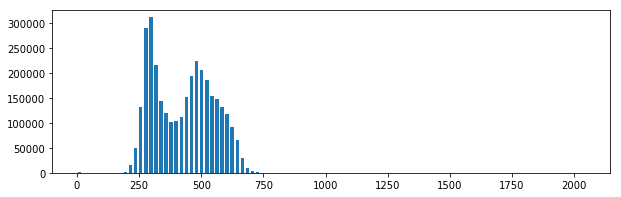

8 bit - Histogramm
----------------


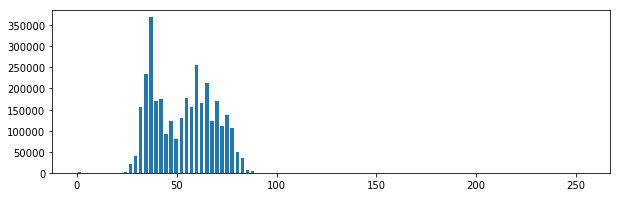

In [5]:
print('16 bit - Histogramm')
print( '----------------')
fig=plt.figure(figsize=(10,3))
#hist, bins = np.histogram(IKOPan, bins=100)         #Anzahl der Intervalle, "bins" verändern
hist, bins = np.histogram(IKORed, bins=100)         #Anzahl der Intervalle, "bins" verändern

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


print('8 bit - Histogramm')
print( '----------------')

fig=plt.figure(figsize=(10,3))
#hist, bins = np.histogram(IKOPan, bins=100)         #Anzahl der Intervalle, "bins" verändern
hist, bins = np.histogram(IKORed8bit, bins=100)         #Anzahl der Intervalle, "bins" verändern

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [17]:
Arr1=np.round(20*np.random.rand(5,5))
#print(Arr1)
Arr2=np.round(20*np.random.rand(5,5))
#print(Arr2)
Arr3=np.round(20*np.random.rand(5,5))
#print(Arr3)

A=np.dstack((Arr1,Arr2,Arr3))
print(15*'-')
print(A.shape)
print(A[:,:,1])

[[ 11.  10.  16.   9.  20.]
 [  3.  20.  15.  11.  19.]
 [ 14.   9.  14.  10.   5.]
 [ 13.  12.   4.   3.   9.]
 [ 19.   2.  11.   8.  18.]]
---------------
(5, 5, 3)
[[ 11.  10.  16.   9.  20.]
 [  3.  20.  15.  11.  19.]
 [ 14.   9.  14.  10.   5.]
 [ 13.  12.   4.   3.   9.]
 [ 19.   2.  11.   8.  18.]]


Function to build an RBG TrueColor Image from scratch
---

http://gis.stackexchange.com/questions/120951/merging-multiple-16-bit-image-bands-to-create-a-true-color-tiff'


In [25]:
def create_composite(red_band, green_band, blue_band):

    img=np.dstack((red_band,green_band,blue_band))
    return img
    #p2, p98 = np.percentile(img, (2, 98)) 
    #img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    #img_rescale = exposure.rescale_intensity(img, in_range='uint16')
    #return bytescale(img)   # Konverting to 8bit for output in jupyter
   
    #return bytescale(img_rescale)   # Konverting to 8bit for output in jupyter
    #return img_rescale

In [27]:
print(image.dtype)


uint16


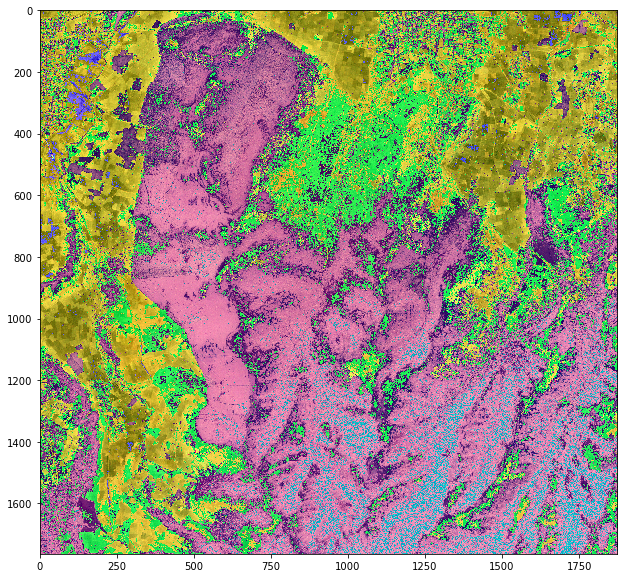

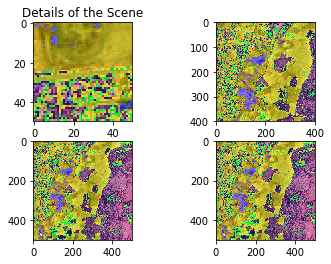

In [28]:
image = create_composite(IKORed, IKOGreen, IKOBlue)
plt.figure(figsize=(20,10))  
#plt.imshow(bytescale(image))
plt.imshow(image)

plt.show()

# see http://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots
  
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(image[0:50,0:50,0:3])
ax1.set_title('Details of the Scene')
ax2.imshow(image[0:400,0:400,0:3])
ax3.imshow(image[0:500,0:500,0:3])
ax4.imshow(image[0:500,0:500,0:3])
plt.show()

In [ ]:
image.dtype

Analyse the Correlation between two Channels
---

In [29]:
np.corrcoef(np.ravel(IKORed),np.ravel(IKOGreen))

array([[ 1.        ,  0.98998491],
       [ 0.98998491,  1.        ]])

In [30]:
from scipy import stats

In [31]:
stats.spearmanr(np.ravel(IKORed),np.ravel(IKOGreen))

SpearmanrResult(correlation=0.99000750346076183, pvalue=0.0)

Filtering of images
---

In [ ]:
from skimage import data,filters,feature
image = data.coins() # or any NumPy array!
#edges = filters.median(image)
plt.imshow(image,cmap='gray')
plt.show()

edges = filters.prewitt(image)
skio.imshow(edges)
skio.show()


edges = filters.sobel(image)
skio.imshow(edges)
skio.show()

edges = feature.canny(image)
skio.imshow(edges)
skio.show()

(480, 446, 3)


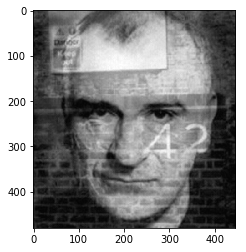

In [38]:
bildDoug=skio.imread('figures/doug.jpg')
print(bildDoug.shape)
plt.imshow(bildDoug)
plt.show()

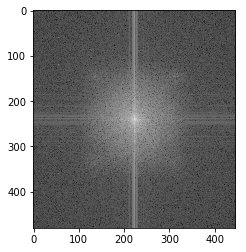

In [40]:
DougFFT    =np.fft.fft2(bildDoug[:,:,0])
DougFFTShift=np.fft.fftshift(DougFFT)
Spectrum   =20*np.log(np.abs(DougFFTShift))

plt.imshow(Spectrum,cmap='gray')
plt.show()

In [49]:
Doug2=np.fft.ifft2(np.fft.ifftshift(DougFFTShift))

#print(Doug2[10:20,10:20])

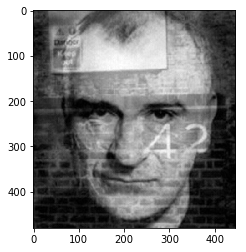

In [48]:
plt.imshow(np.abs(Doug2),cmap='gray')